In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr

In [2]:
hds = xr.open_dataset("hrrr.nc")
hds = hds.rename({"x_vertices": "x_b", "y_vertices": "y_b"})

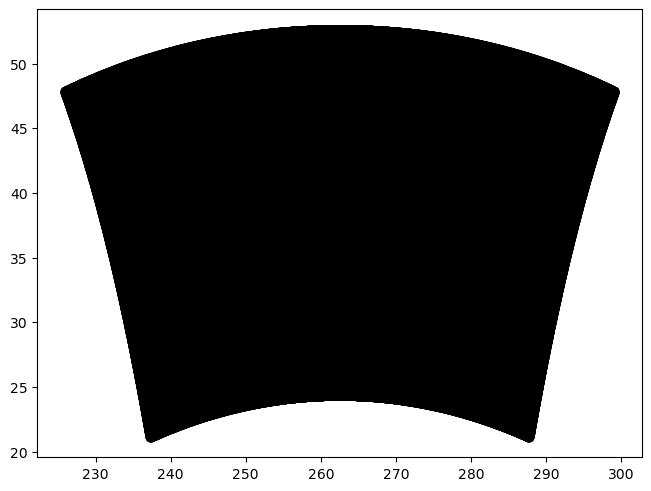

In [3]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(hds.lon, hds.lat, c="black")

### Bottom Left

In [4]:
bl = hds.isel(x=slice(10), y=slice(10), x_b=slice(11), y_b=slice(11))
cbl = hds.isel(
    x=slice(1, 10, 3),
    y=slice(1, 10, 3),
    x_b=slice(0, 11, 3),
    y_b=slice(0, 11, 3),
)

In [5]:
bl

<xarray.Dataset> Size: 4kB
Dimensions:  (t0: 1, y: 10, x: 10, y_b: 11, x_b: 11)
Coordinates:
  * t0       (t0) datetime64[ns] 8B 2015-01-15
    lat      (y, x) float64 800B 21.14 21.14 21.15 21.16 ... 21.41 21.42 21.42
    lon      (y, x) float64 800B 237.3 237.3 237.3 237.4 ... 237.4 237.4 237.5
    lat_b    (y_b, x_b) float64 968B ...
    lon_b    (y_b, x_b) float64 968B ...
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    orog     (t0, y, x) float32 400B ...

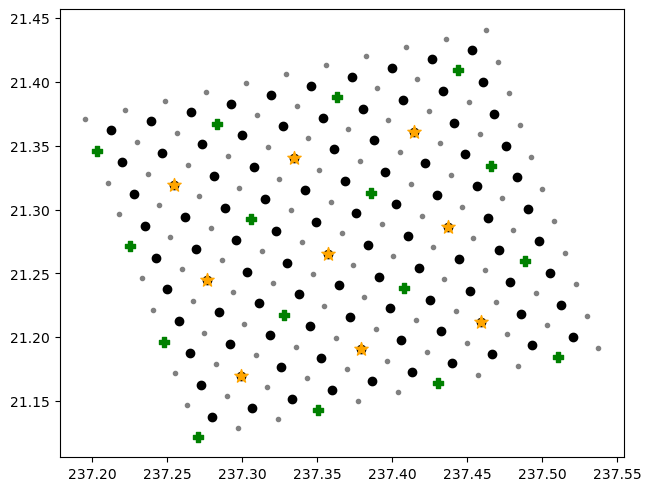

In [6]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(bl.lon, bl.lat, c="black")
ax.scatter(bl.lon_b, bl.lat_b, c="gray", marker=".")
ax.scatter(cbl.lon, cbl.lat, c="orange", marker="*", s=100)
ax.scatter(cbl.lon_b, cbl.lat_b, c="green", marker="P", s=50)

Looks good. So...
* Start `x,y` at index=1, skip by 3
* Start bounds at index=0, skip by 3

In [7]:
chds = hds.isel(
    x=slice(1, None, 3),
    y=slice(1, None, 3),
    x_b=slice(0, None, 3),
    y_b=slice(0, None, 3),
)

In [8]:
bl = hds.isel(x=slice(10), y=slice(10), x_b=slice(11), y_b=slice(11))
cbl = chds.isel(x=slice(3), y=slice(3), x_b=slice(4), y_b=slice(4))

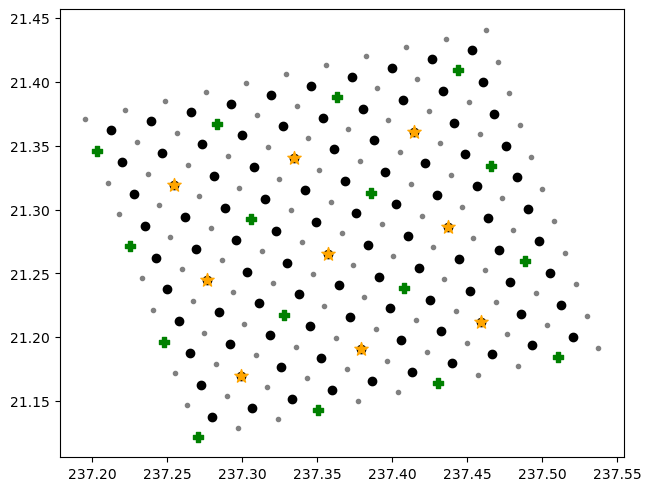

In [9]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(bl.lon, bl.lat, c="black")
ax.scatter(bl.lon_b, bl.lat_b, c="gray", marker=".")
ax.scatter(cbl.lon, cbl.lat, c="orange", marker="*", s=100)
ax.scatter(cbl.lon_b, cbl.lat_b, c="green", marker="P", s=50)

### Top Right

In [10]:
tr = hds.isel(x=slice(-10, None), y=slice(-10, None), x_b=slice(-11, None), y_b=slice(-11, None))
ctr = chds.isel(x=slice(-3, None), y=slice(-3, None), x_b=slice(-4, None), y_b=slice(-4, None))

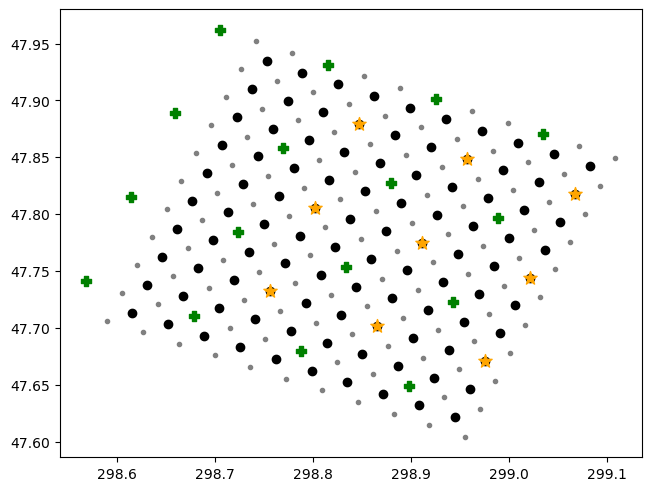

In [11]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(tr.lon, tr.lat, c="black")
ax.scatter(tr.lon_b, tr.lat_b, c="gray", marker=".")
ax.scatter(ctr.lon, ctr.lat, c="orange", marker="*", s=100)
ax.scatter(ctr.lon_b, ctr.lat_b, c="green", marker="P", s=50)

This shows that we have one hanging point on the far right, lets hack off two x-point then it should be perfect.

In [12]:
if len(hds.x) == 1799:
    hds = hds.isel(x=slice(None, -2), x_b=slice(None, -2))

In [13]:
chds = hds.isel(
    x=slice(1, None, 3),
    y=slice(1, None, 3),
    x_b=slice(0, None, 3),
    y_b=slice(0, None, 3),
)

Try top right corner again

In [14]:
tr = hds.isel(x=slice(-10, None), y=slice(-10, None), x_b=slice(-11, None), y_b=slice(-11, None))
ctr = chds.isel(x=slice(-3, None), y=slice(-3, None), x_b=slice(-4, None), y_b=slice(-4, None))

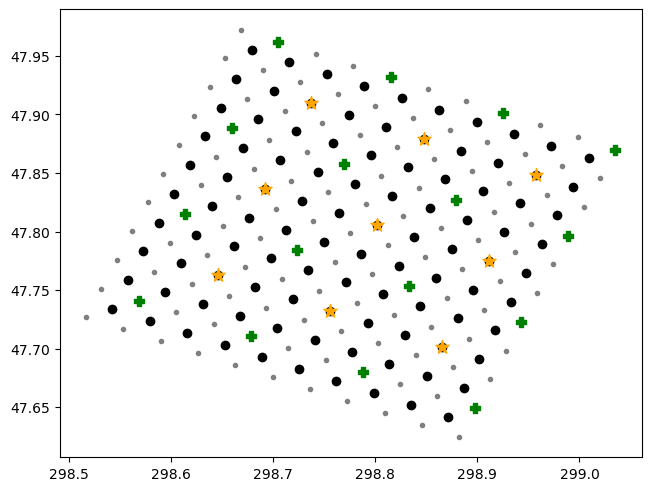

In [15]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(tr.lon, tr.lat, c="black")
ax.scatter(tr.lon_b, tr.lat_b, c="gray", marker=".")
ax.scatter(ctr.lon, ctr.lat, c="orange", marker="*", s=100)
ax.scatter(ctr.lon_b, ctr.lat_b, c="green", marker="P", s=50)

### Check Bottom Left again

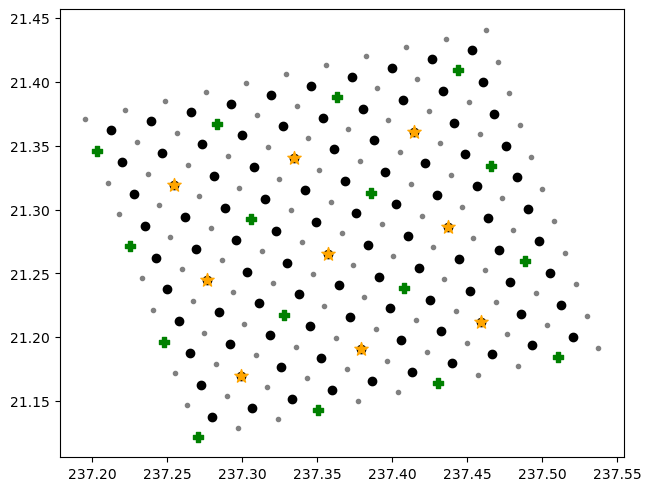

In [16]:
bl = hds.isel(x=slice(10), y=slice(10), x_b=slice(11), y_b=slice(11))
cbl = chds.isel(x=slice(3), y=slice(3), x_b=slice(4), y_b=slice(4))

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(bl.lon, bl.lat, c="black")
ax.scatter(bl.lon_b, bl.lat_b, c="gray", marker=".")
ax.scatter(cbl.lon, cbl.lat, c="orange", marker="*", s=100)
ax.scatter(cbl.lon_b, cbl.lat_b, c="green", marker="P", s=50)

### Top left

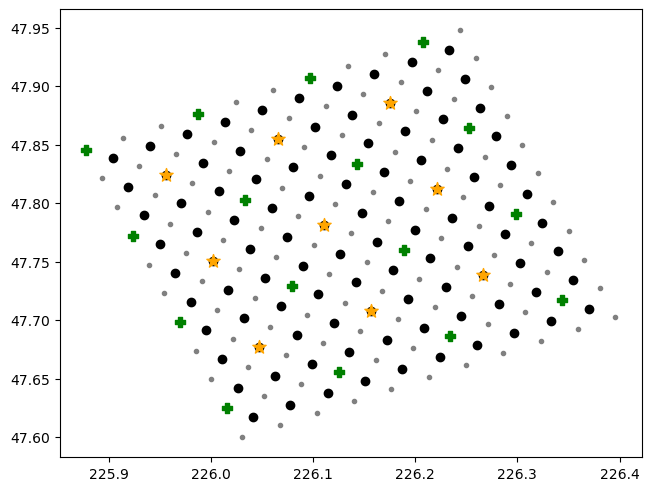

In [17]:
tl = hds.isel(x=slice(10), y=slice(-10, None), x_b=slice(11), y_b=slice(-11, None))
ctl = chds.isel(x=slice(3), y=slice(-3, None), x_b=slice(4), y_b=slice(-4, None))

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(tl.lon, tl.lat, c="black")
ax.scatter(tl.lon_b, tl.lat_b, c="gray", marker=".")
ax.scatter(ctl.lon, ctl.lat, c="orange", marker="*", s=100)
ax.scatter(ctl.lon_b, ctl.lat_b, c="green", marker="P", s=50)

### Bottom Right

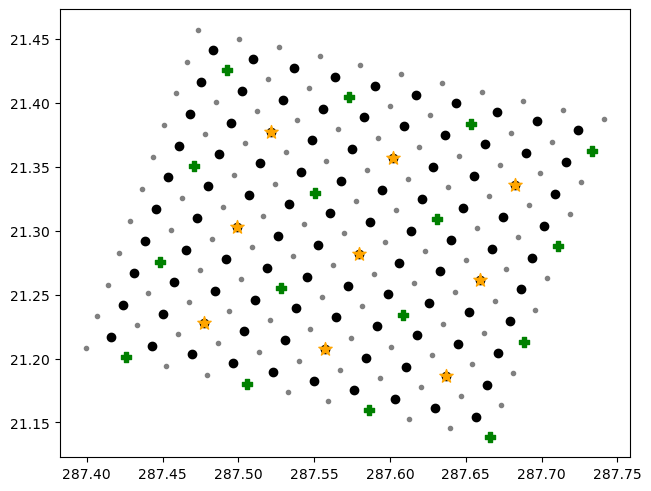

In [18]:
br = hds.isel(y=slice(10), x=slice(-10, None), y_b=slice(11), x_b=slice(-11, None))
cbr = chds.isel(y=slice(3), x=slice(-3, None), y_b=slice(4), x_b=slice(-4, None))

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(br.lon, br.lat, c="black")
ax.scatter(br.lon_b, br.lat_b, c="gray", marker=".")
ax.scatter(cbr.lon, cbr.lat, c="orange", marker="*", s=100)
ax.scatter(cbr.lon_b, cbr.lat_b, c="green", marker="P", s=50)

In [19]:
chds

<xarray.Dataset> Size: 8MB
Dimensions:  (t0: 1, y: 353, x: 599, y_b: 354, x_b: 600)
Coordinates:
  * t0       (t0) datetime64[ns] 8B 2015-01-15
    lat      (y, x) float64 2MB 21.17 21.19 21.21 21.23 ... 47.91 47.88 47.85
    lon      (y, x) float64 2MB 237.3 237.4 237.5 237.5 ... 298.7 298.8 299.0
    lat_b    (y_b, x_b) float64 2MB ...
    lon_b    (y_b, x_b) float64 2MB ...
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    orog     (t0, y, x) float32 846kB ...